## NATALIA PLUTA - CPS

# Data Analytics -  Lab 1 - Random data visualisation and sampling

1. Create a ```jupyter``` notebook.

2. Using ```numpy.random``` generate arrays of:
   - 1000 samples of uniform distribution on interval $[0,1]$
   - 1000 samples of normal distribution with mean $\mu=0$ and standard deviation $\sigma=1$.
   - 1000 samples of normal distribution with mean $\mu=0$ and standard deviation $\sigma=10$.
   - 1000 samples of beta distribution for the following pairs of parameters $(\alpha,\beta)\in\{(0,0), (2,2),(3,9)\}$
   - 10000 samples of two-dimensional normal distributions each with  mean $\mu=[0,0]^\mathsf{T}$ and covariance matrices
```math
\Sigma_1=\begin{bmatrix}1&0\\0&1\end{bmatrix}
```

```math
\Sigma_2=\begin{bmatrix}2&1\\1&2\end{bmatrix}

3. For one dimensional distributions plot histograms. Assign bin values to represent the geometry of distribution. Compare the histograms (normalized) with plots of analytical formulas for distributions (see eg. Wikipedia).

4. For two-dimensional distributions use ```hist2d``` method from ```pyplot```. Try to analyze influence of bins. Try different 2d histogram functions (ex. from ```seaborn```).

5. Generate 1000 $y$ points from the following model (
First sample $\alpha,\ \beta,\ x, \ \sigma$, then compute $\mu$ algebraically, then sample a value of $y$. Do this 1000 times. To get HalfNormal sample from Normal and take the absolute value of result)
```math
    \begin{aligned}
    y\sim{}& \mathrm{Normal}(\mu, \sigma)\\
    \mu={}& \alpha + \beta x\\
    \alpha\sim{}&\mathrm{Normal}(2,0.1)\\
    \beta\sim{}&\mathrm{Normal}(0.2,0.2)\\
    x\sim{}&\mathrm{Normal}(0,3)\\
    \sigma\sim{}&\mathrm{HalfNormal}(0,1)
    \end{aligned} 
``` 

6. Plot $y$ values as a function of $x$. Compare them with lines of $y=\alpha+\beta x$, plotted for $x$ between -6 and 6 for each of randomly sampled $\alpha$ and $\beta$ pair (on the same plot).

In [1]:
# Task 2

import numpy as np

uniform = np.random.uniform(low=0.0, high=1.0, size=1000)

mu, sigma = 0, 1 # mean and standard deviation
normal_1 = np.random.normal(mu, sigma, 1000)

sigma = 10
normal_2 = np.random.normal(mu, sigma, 1000)

beta_1 = np.random.beta(1, 1, 1000)
beta_2 = np.random.beta(2, 2, 1000)
beta_3 = np.random.beta(3, 9, 1000)

mean = [0, 0]
cov1 = [[1, 0], [0, 1]]  # diagonal covariance
normal2d_1 = np.random.multivariate_normal(mean, cov1, 10000)

cov2 = [[2, 1], [1, 2]]  # diagonal covariance
normal2d_2 = np.random.multivariate_normal(mean, cov2, 10000)

print(normal2d_2)

[[-1.64799281 -1.37547553]
 [ 1.10886639 -0.30494694]
 [-0.27333455  0.2130054 ]
 ...
 [ 2.3613403   1.62569188]
 [ 0.75593208  0.1020774 ]
 [ 0.22689649 -0.0037489 ]]


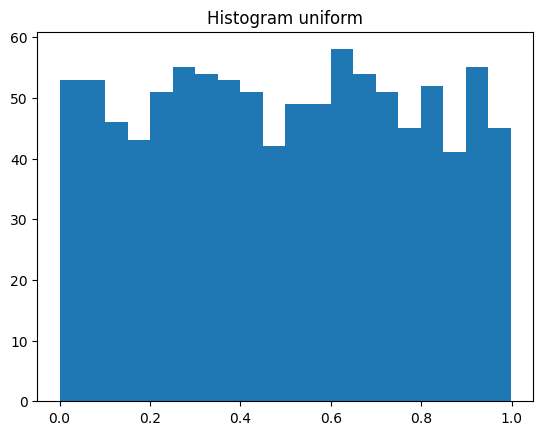

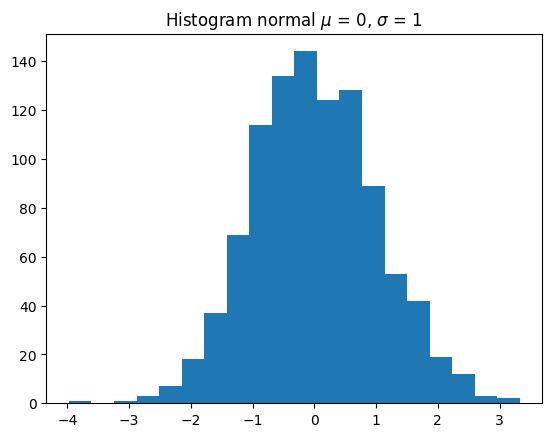

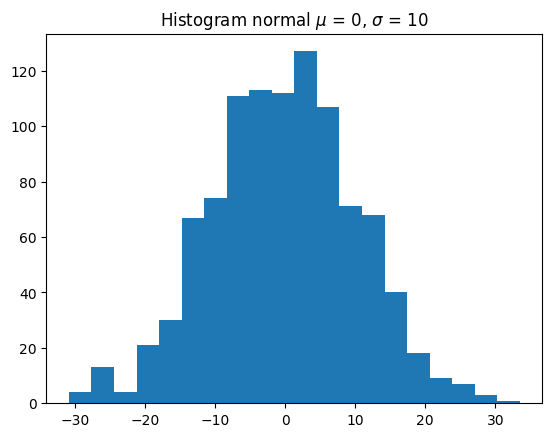

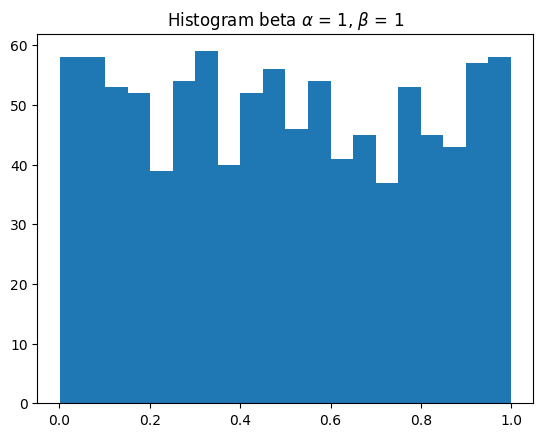

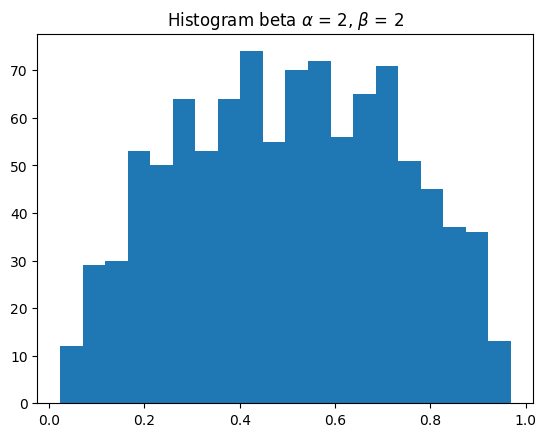

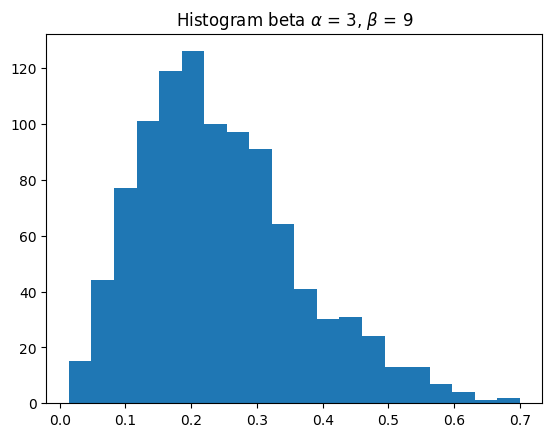

In [2]:
# Task 3

distributions_1d = (uniform, normal_1, normal_2, beta_1, beta_2, beta_3)

import matplotlib
import matplotlib.pyplot as plt

num_bins = 20
hist_text = "Histogram "
labels = ["uniform", r"normal $\mu$ = 0, $\sigma$ = 1", r"normal $\mu$ = 0, $\sigma$ = 10", r"beta $\alpha$ = 1, $\beta$ = 1", r"beta $\alpha$ = 2, $\beta$ = 2", r"beta $\alpha$ = 3, $\beta$ = 9"]
for index, distribution in enumerate(distributions_1d):
    plt.figure(index)
    plt.title(hist_text + labels[index])
    n, bins, patches = plt.hist(distribution, bins=num_bins)
    plt.show()

Histograms 2d 
μ = [0,0]ᵀ
σ = 
[[1 0]
 [0 1]]


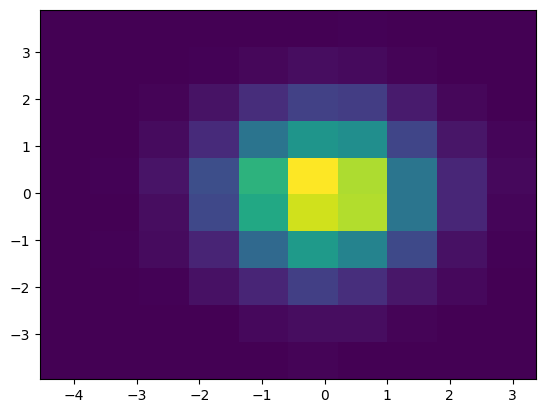

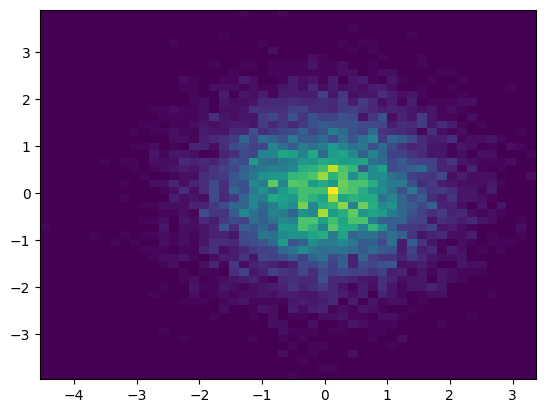

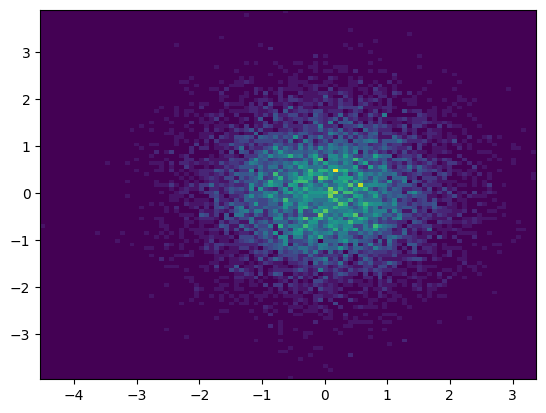

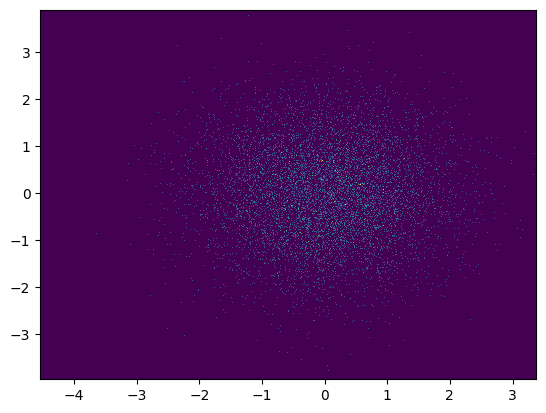

Histograms 2d 
μ = [0,0]ᵀ
σ = 
[[2 1]
 [1 2]]


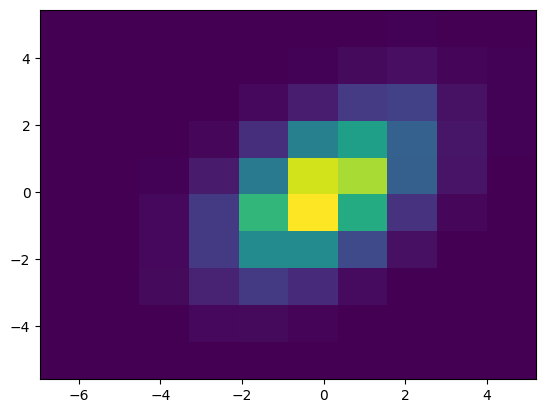

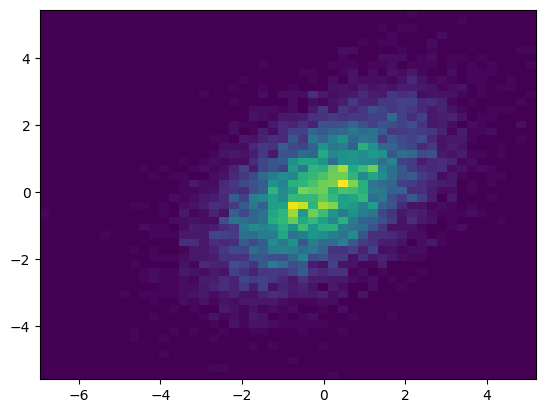

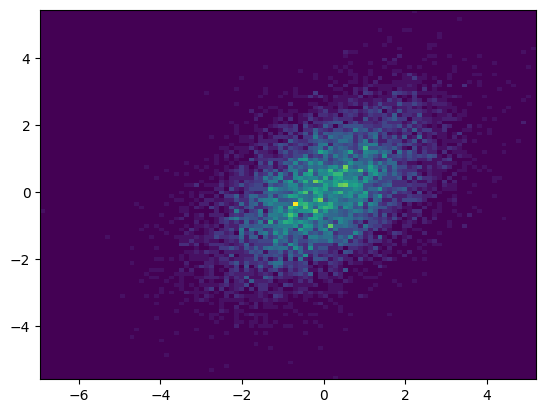

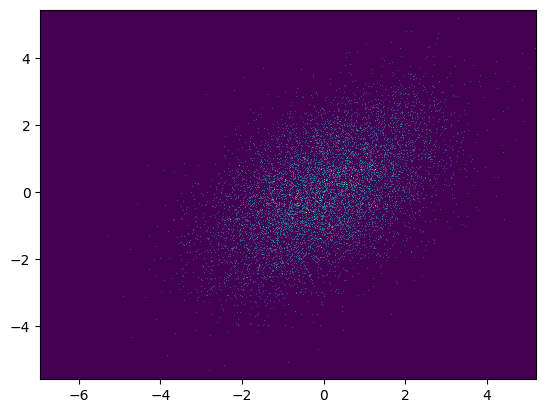

In [3]:
# Task 4
distributions_2d = (normal2d_1, normal2d_2)

hist_text = "Histograms 2d "
covs = [cov1, cov2]
bins_numbers = [10, 50, 100, 500]
for index, distribution in enumerate(distributions_2d):
    print(hist_text)
    print("\u03BC = [0,0]ᵀ")
    print("\u03C3 = ")
    print(np.matrix(covs[index]))
    for bin_num in bins_numbers:
        matplotlib.pyplot.hist2d(distribution[:, 0], distribution[:, 1], bins=bin_num)
        plt.show()

In [4]:
%pip install seaborn

Histograms 2d seaborn
μ = [0,0]ᵀ
σ = 
[[1 0]
 [0 1]]


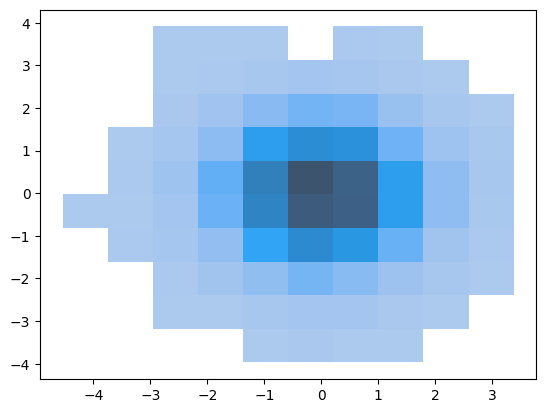

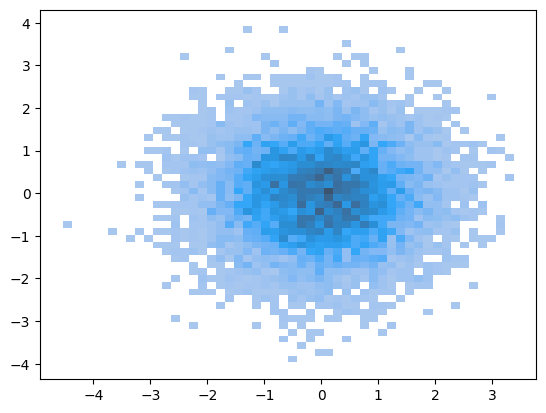

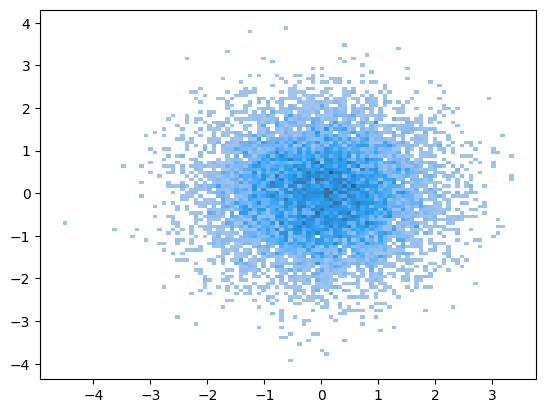

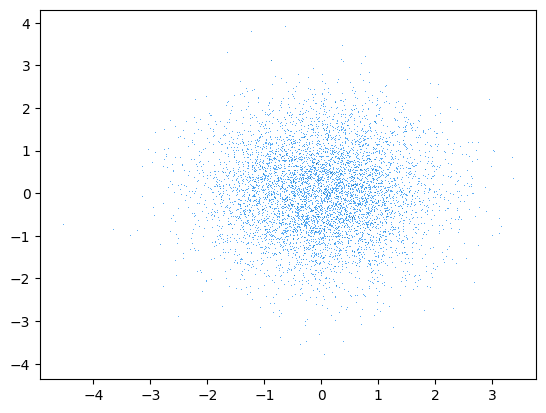

Histograms 2d seaborn
μ = [0,0]ᵀ
σ = 
[[2 1]
 [1 2]]


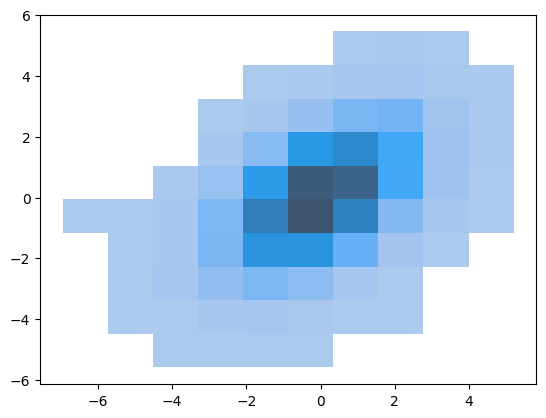

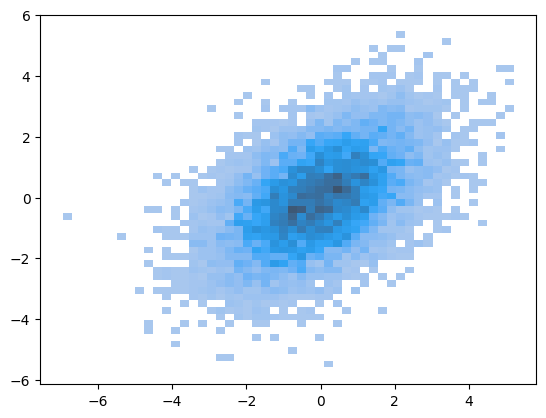

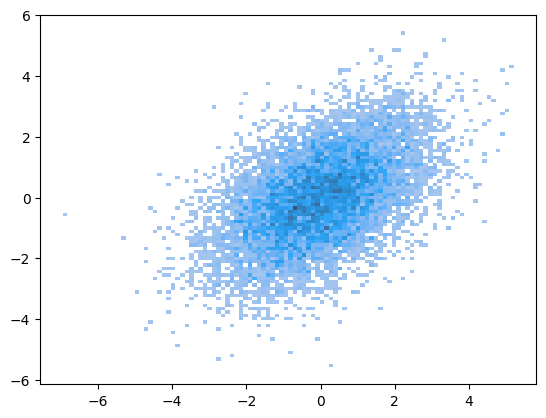

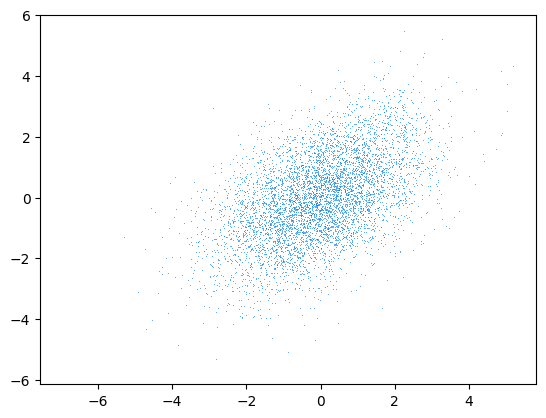

In [5]:
# Task 4 Seaborn
import seaborn as sns
for index, distribution in enumerate(distributions_2d):
    print(hist_text + "seaborn")
    print("\u03BC = [0,0]ᵀ")
    print("\u03C3 = ")
    print(np.matrix(covs[index]))
    for bin_num in bins_numbers:
        sns.histplot(x = distribution[:, 0], y = distribution[:, 1], bins=bin_num)
        plt.show()

In [21]:
# Task 5
num_samples = 1000

alpha = np.random.normal(2, 0.1, num_samples)
beta = np.random.normal(0.2, 0.2, num_samples)
x = np.random.normal(0, 3, num_samples)
sigma = np.abs(np.random.normal(0, 1, num_samples))
mu = alpha + x*beta
y = np.random.normal(mu, sigma)

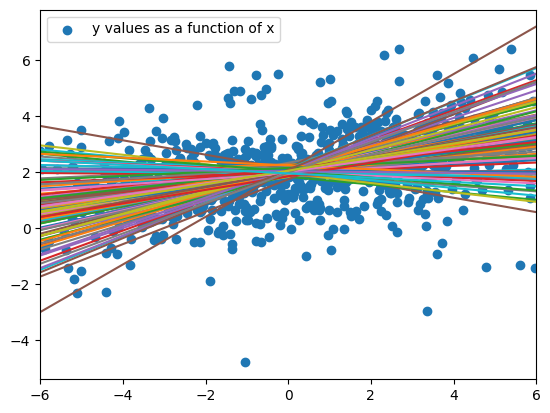

In [27]:
# Task 6
func_samples = 100
plt.xlim([-6, 6])
plt.scatter(x, y, label='y values as a function of x')
x_funcs = np.linspace(-6, 6, func_samples)

for i in range(func_samples):
    alpa_fun = np.random.choice(alpha)
    beta_fun = np.random.choice(beta)
    y_func = alpa_fun + beta_fun*x_funcs
    plt.plot(x_funcs,y_func)
    
plt.legend()
plt.show()